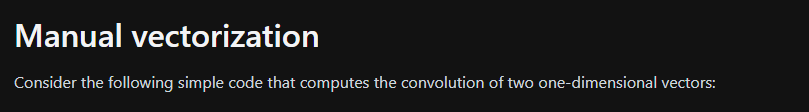

In [1]:
import jax
import jax.numpy as jnp
jax.config.update('jax_platform_name', 'cpu')

x = jnp.arange(5)
w = jnp.array([2., 3., 4.])

def convolve(x, w):
  output = []
  for i in range(1, len(x)-1):
    output.append(jnp.dot(x[i-1:i+2], w))
  return jnp.array(output)

convolve(x, w)

Array([11., 20., 29.], dtype=float32)

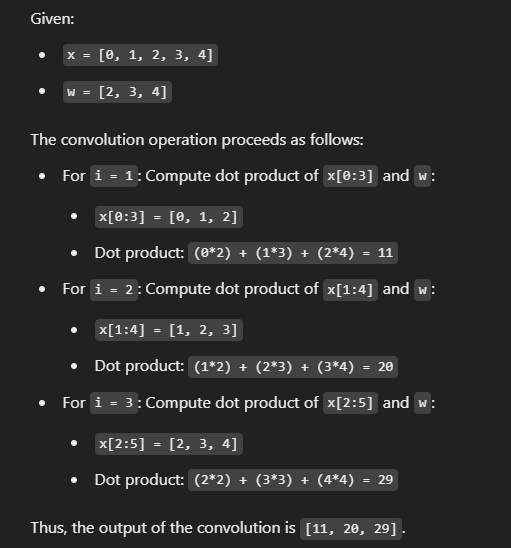

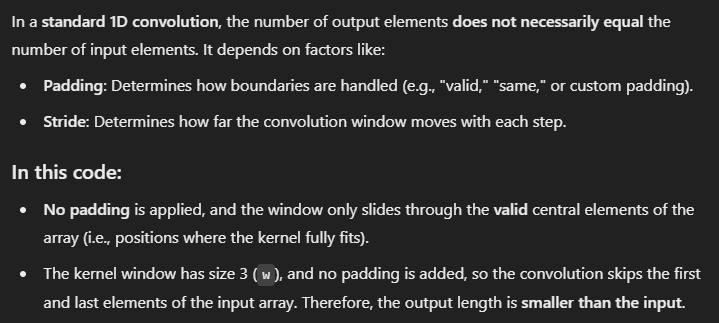

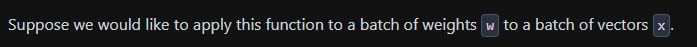

In [2]:
xs = jnp.stack([x, x])
ws = jnp.stack([w, w])

In [3]:
def manually_batched_convolve(xs, ws):
  output = []
  for i in range(xs.shape[0]):
    output.append(convolve(xs[i], ws[i]))
  return jnp.stack(output)

manually_batched_convolve(xs, ws)

Array([[11., 20., 29.],
       [11., 20., 29.]], dtype=float32)

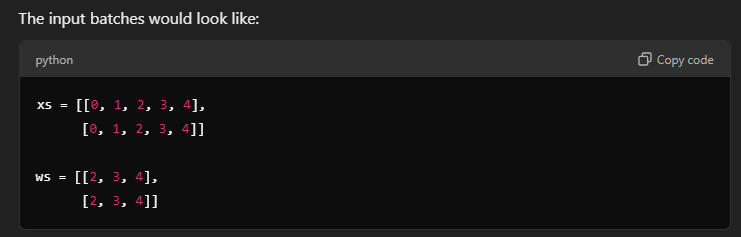

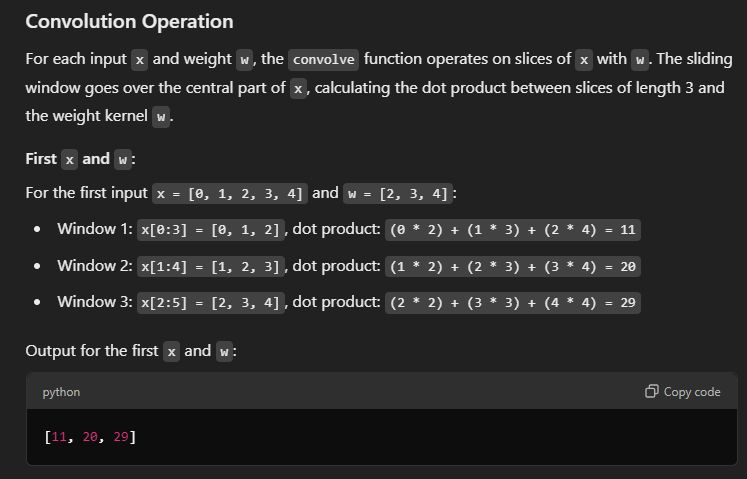

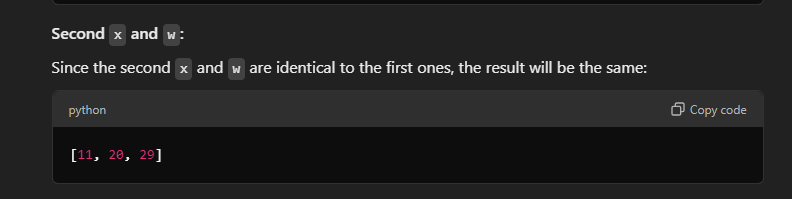

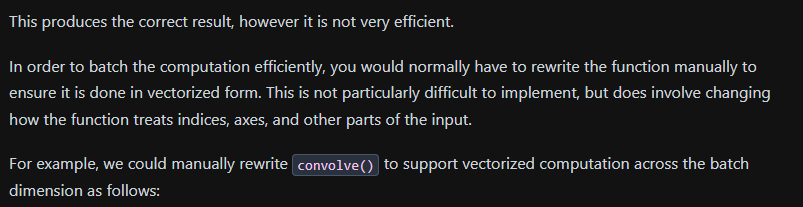

In [6]:
xs.shape[-1]-1

4

In [10]:
ws.shape

(2, 3)

In [11]:
i=1
xs[:, i-1:i+2].shape

(2, 3)

In [15]:
i=1
xs[:, i-1:i+2].transpose().shape

(3, 2)

In [8]:
i=1
xs[:, i-1:i+2]

Array([[0, 1, 2],
       [0, 1, 2]], dtype=int32)

In [9]:
i=1
xs[:, i-1:i+2]*ws

Array([[0., 3., 8.],
       [0., 3., 8.]], dtype=float32)

In [16]:
def manually_vectorized_convolve(xs, ws):
  output = []
  for i in range(1, xs.shape[-1] -1):
    output.append(jnp.sum(xs[:, i-1:i+2] * ws, axis=1))
  return jnp.stack(output, axis=1)

manually_vectorized_convolve(xs, ws)

Array([[11., 20., 29.],
       [11., 20., 29.]], dtype=float32)

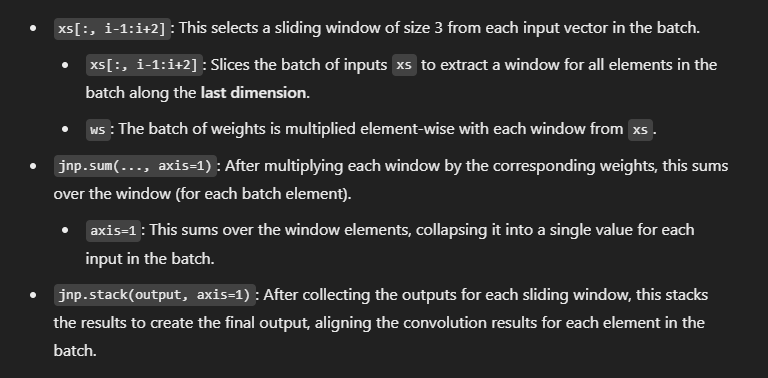

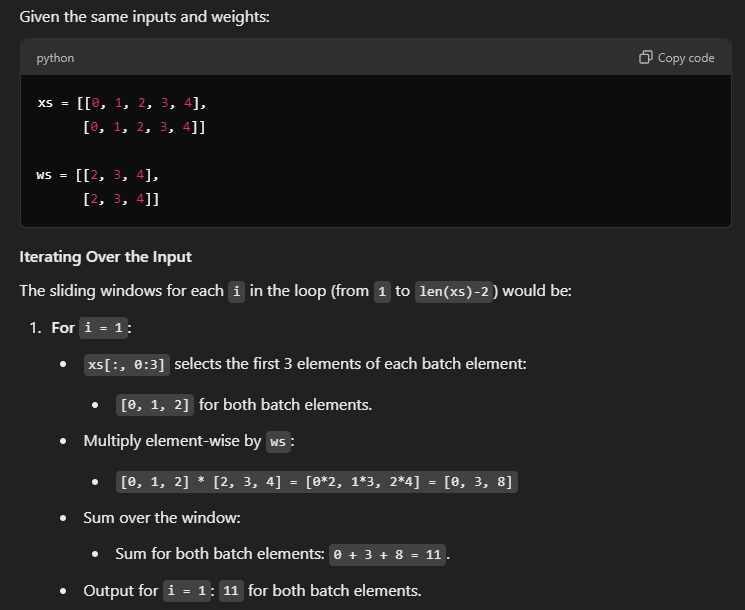

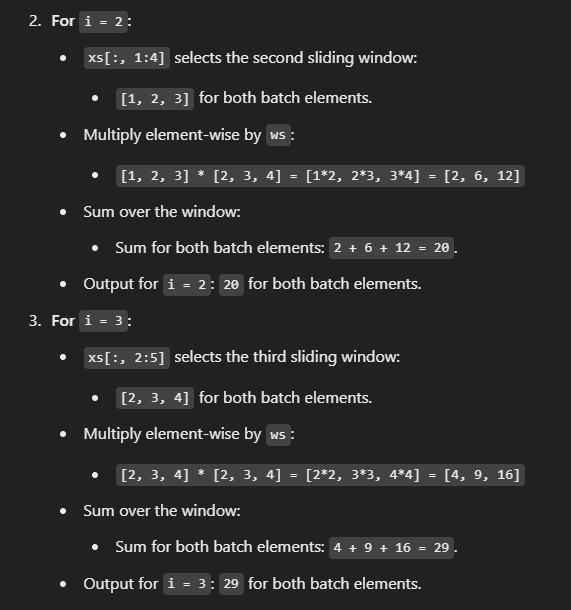

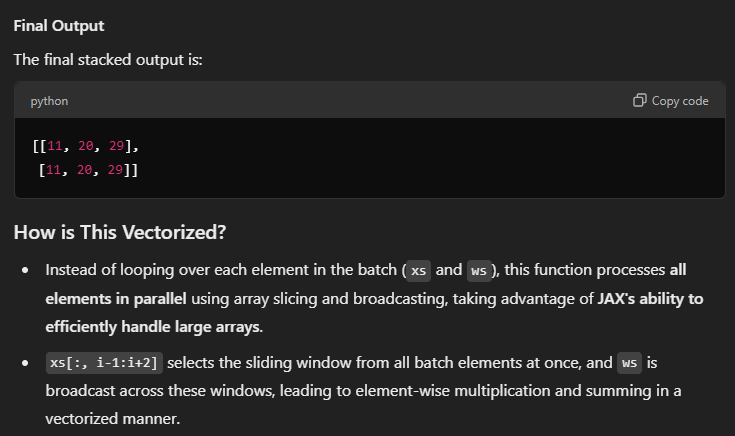

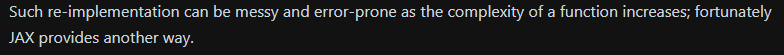

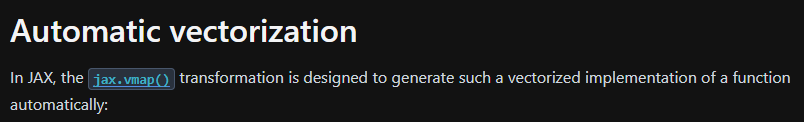

In [17]:
auto_batch_convolve = jax.vmap(convolve)

auto_batch_convolve(xs, ws)

Array([[11., 20., 29.],
       [11., 20., 29.]], dtype=float32)

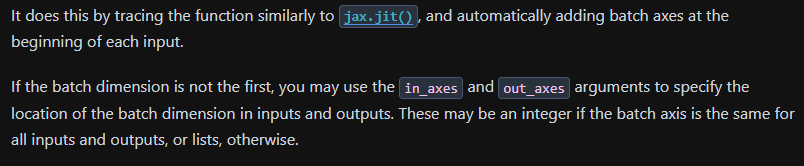

In [18]:
auto_batch_convolve_v2 = jax.vmap(convolve, in_axes=1, out_axes=1)

xst = jnp.transpose(xs)
wst = jnp.transpose(ws)

auto_batch_convolve_v2(xst, wst)

Array([[11., 11.],
       [20., 20.],
       [29., 29.]], dtype=float32)

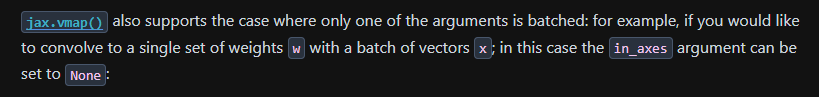

In [19]:
batch_convolve_v3 = jax.vmap(convolve, in_axes=[0, None])

batch_convolve_v3(xs, w)

Array([[11., 20., 29.],
       [11., 20., 29.]], dtype=float32)

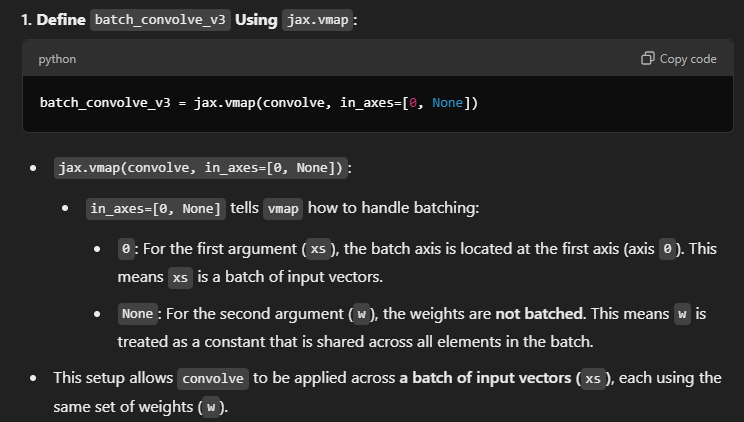

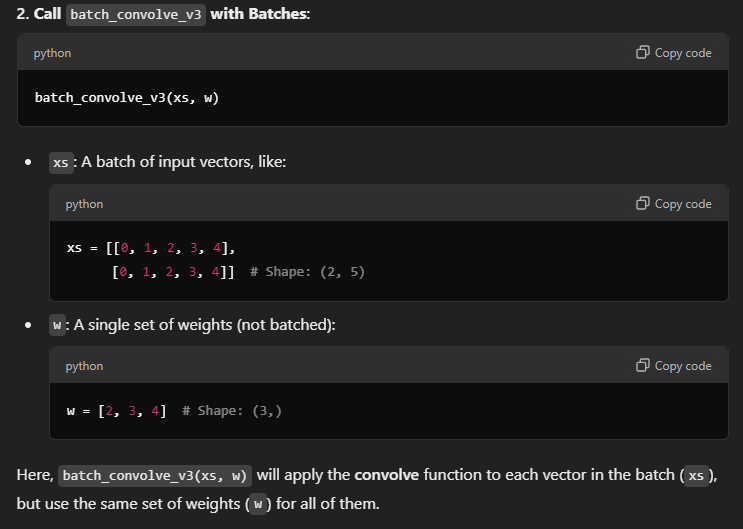

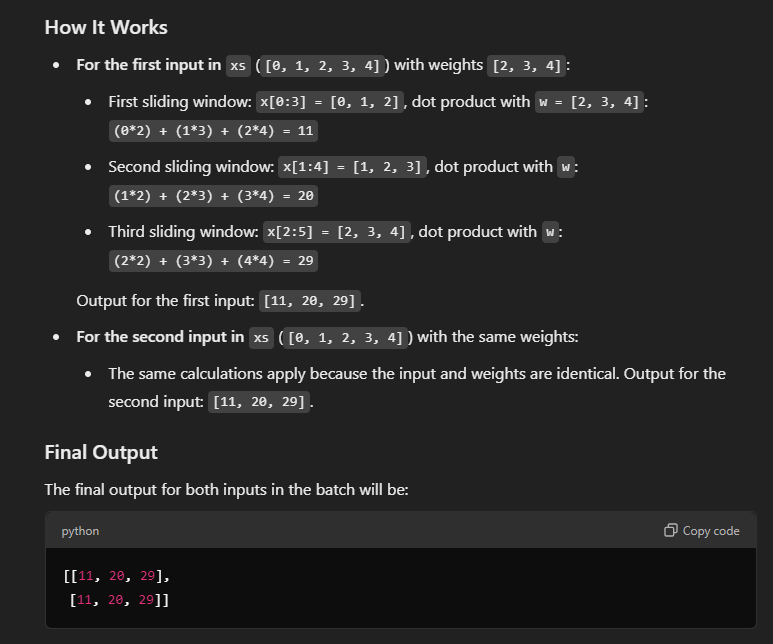

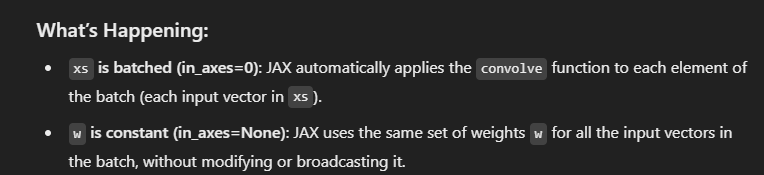

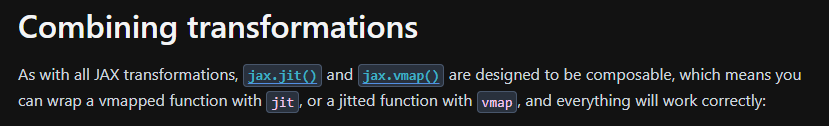

In [20]:
jitted_batch_convolve = jax.jit(auto_batch_convolve)

jitted_batch_convolve(xs, ws)

Array([[11., 20., 29.],
       [11., 20., 29.]], dtype=float32)